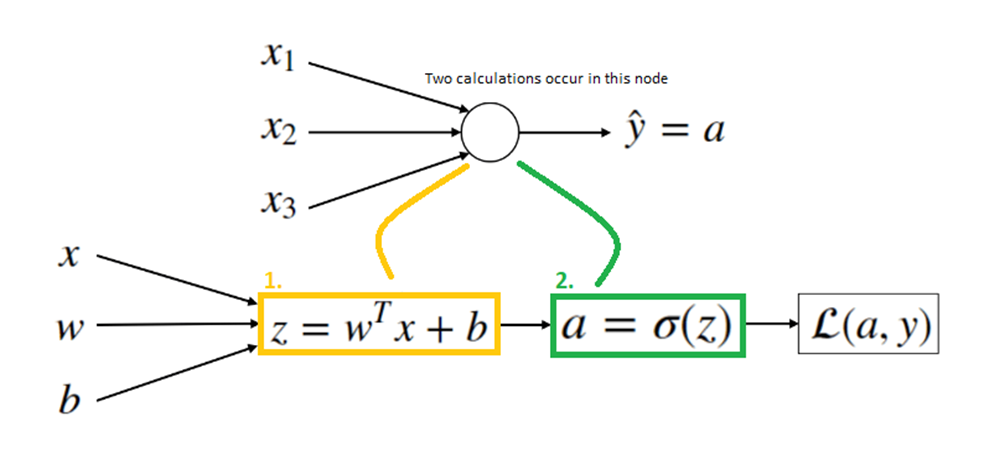

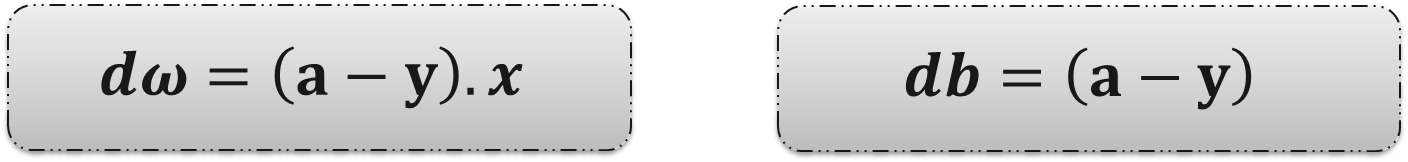

In [10]:
import numpy as np


def sigmoid(x):
    return (1/(1+np.exp(-x)))


class LogisticRegression:

    def __init__(self , lr=0.001 , n_iter=1000):

        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self,X_train , y_train):

        n_samples , n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_pred = np.dot(X_train,self.weights) + self.bias
            y_pred = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X_train.T,(y_pred-y_train))# y_pred = a
            db = (1/n_samples) * np.sum(y_pred-y_train)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self,X_test):

        linear_pred = np.dot(X_test,self.weights) + self.bias
        y_probs = sigmoid(linear_pred)
        y_preds = [1 if i>=0.5 else 0 for i in y_probs]
        return y_preds

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()

X , y = bc.data , bc.target

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

clf = LogisticRegression()

In [13]:
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

C:\Users\SENAR7\AppData\Local\Temp\1\ipykernel_22556\1802157110.py:5: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


In [14]:
def accuracy(preds,actual):
    return np.mean(preds==actual)

In [15]:
accuracy(preds,y_test)

0.8596491228070176